In [4]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# 2.1 load and aggregate earthquake data (multiple .csv files) and create a dataframe object that you will name it as 'usgs'.
# 2.2 keep the following variables: time, latitude, longitude, depth, mag, magType, nst, and rms
usgs = pd.read_csv('query.csv')
usgs = usgs[["time", "latitude", "longitude", "depth", "mag", "magType", "nst", "rms"]]

In [5]:
usgs.head()

,time,latitude,longitude,depth,mag,magType,nst,rms
0,2004-12-31T22:13:09.000Z,-32.481,-70.191,110.1,4.6,mb,27.0,NaN
1,2004-12-31T22:09:27.360Z,9.435,93.895,44.1,5.3,mwc,92.0,1.03
2,2004-12-31T22:05:49.410Z,12.436,92.746,30.0,4.5,mb,12.0,0.60
3,2004-12-31T21:03:07.440Z,-53.124,140.534,10.0,4.8,mb,16.0,1.72
4,2004-12-31T21:01:04.380Z,8.208,94.001,30.0,4.5,mb,6.0,1.41


In [9]:
usgs['time'] = usgs['time'].apply(lambda x: x[0: 10])
usgs['time'] = usgs['time'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [26]:
usgs.head()
len(usgs)

16280

In [18]:
usgs['year'] = usgs['time'].dt.year
usgs['eventid'] = [x for x in range(1, len(usgs) + 1)]

In [19]:
usgs.head()

,time,latitude,longitude,depth,mag,magType,nst,rms,year,eventid
0,2004-12-31,-32.481,-70.191,110.1,4.6,mb,27.0,NaN,2004,1
1,2004-12-31,9.435,93.895,44.1,5.3,mwc,92.0,1.03,2004,2
2,2004-12-31,12.436,92.746,30.0,4.5,mb,12.0,0.60,2004,3
3,2004-12-31,-53.124,140.534,10.0,4.8,mb,16.0,1.72,2004,4
4,2004-12-31,8.208,94.001,30.0,4.5,mb,6.0,1.41,2004,5


In [20]:
usgs = usgs[usgs['time'] >= '2001-01-01'][usgs['time'] <= '2004-12-31']

In [25]:
usgs.head()
len(usgs)

16280

3. Plot and analysis in python
3.1. Extract rows with unique coordinates (unique pair of longitude and latitude)
3.2. Plot the extracted rows in a map so that we can identify the location of each earthquake and the magnitude of the event (choose a way to highlight the size of the earthquake along with its location on the map) and save the plot(s) as pdf file named "earthquake.pdf"
	(if the plot is not clear you can prepare multiple plots by regions worldwide)
3.3. Provide a summary of the variable 'mag' and save the summary into a table that you will name 'magsummary'
3.3. Plot the relationship (points) between the variable 'mag' and 'depth' and save the plot as pdf file named "mag.pdf"

In [32]:
unique_coordinates = usgs.drop_duplicates(subset = ['longitude', 'latitude'])

In [33]:
len(unique_coordinates)
unique_coordinates.head()

,time,latitude,longitude,depth,mag,magType,nst,rms,year,eventid
0,2004-12-31,-32.481,-70.191,110.1,4.6,mb,27.0,NaN,2004,1
1,2004-12-31,9.435,93.895,44.1,5.3,mwc,92.0,1.03,2004,2
2,2004-12-31,12.436,92.746,30.0,4.5,mb,12.0,0.60,2004,3
3,2004-12-31,-53.124,140.534,10.0,4.8,mb,16.0,1.72,2004,4
4,2004-12-31,8.208,94.001,30.0,4.5,mb,6.0,1.41,2004,5


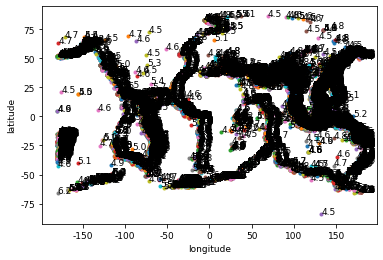

In [58]:
# max_lng = round((round(max(unique_coordinates['longitude']),4)+0.0001),2)
# min_lng = round((round(min(unique_coordinates['longitude']),4)-0.0001),2)
# range_lng = round(max_lng-min_lng,2)
# max_lat = round((round(max(unique_coordinates['latitude']),4)+0.0001),2)
# min_lat = round((round(min(unique_coordinates['latitude']),4)-0.0001),2)
# range_lat = round(max_lat-min_lat,2)

# #画图
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams.update({"font.size":9})
fig = plt.figure() #绘制画布
# plt.xlim(min_lng, max_lng) #设定X轴的区间
# plt.ylim(min_lat, max_lat) #设定y轴的区间

for text, lng, lat in zip(unique_coordinates['mag'],unique_coordinates['longitude'],unique_coordinates['latitude']):
    plt.plot(float(lng), float(lat), '.')
    plt.annotate(text, (float(lng), float(lat)))

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.savefig('earthquake.pdf', dpi=300)


In [44]:
magsummary = usgs.mag.describe()
magsummary

count    16280.000000
mean         4.854848
std          0.417392
min          3.380000
25%          4.600000
50%          4.700000
75%          5.000000
max          9.100000
Name: mag, dtype: float64

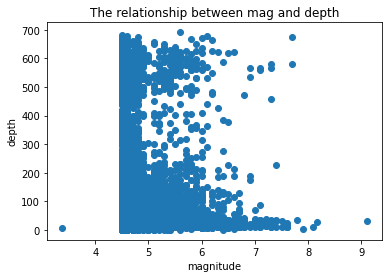

In [49]:
plt.scatter(usgs['mag'], usgs['depth'])
plt.xlabel('magnitude')
plt.ylabel('depth')
plt.title('The relationship between mag and depth')
plt.savefig('mag.pdf', dpi=300)

In [51]:
import pickle
pickle.dump(usgs, open("usgs", 'wb'))  # 序列化
pickle.dump(magsummary, open("magsummary", 'wb'))  # 序列化